# Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Leemos el dataset

In [3]:
df = pd.read_csv('../data/train.csv')

# Análisis

Primero podemos usar .info para tener una idea general del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

Con value_counts() podemos ver la distribución de valores que toma una columna en particular

In [4]:
df['antiguedad'].value_counts()

0.0     50335
5.0     33268
10.0    28844
20.0    19904
1.0     12353
4.0      7944
3.0      5616
2.0      5059
15.0     3965
6.0      3169
30.0     3055
8.0      2418
25.0     2297
7.0      2046
12.0     1492
11.0     1434
40.0     1347
50.0     1193
9.0      1065
35.0      938
18.0      908
21.0      742
16.0      700
14.0      616
13.0      577
17.0      529
22.0      448
28.0      396
26.0      369
45.0      329
        ...  
47.0       40
55.0       38
48.0       36
46.0       31
70.0       29
41.0       27
80.0       27
53.0       17
49.0       17
65.0       17
52.0       11
58.0       10
54.0        9
75.0        6
66.0        5
59.0        5
69.0        5
67.0        4
57.0        4
63.0        4
62.0        3
56.0        3
74.0        2
68.0        2
79.0        2
61.0        2
76.0        2
71.0        1
77.0        1
64.0        1
Name: antiguedad, Length: 78, dtype: int64

Si la columna tiene un valor númerico puede ser interesante ver su histograma con la función hist()

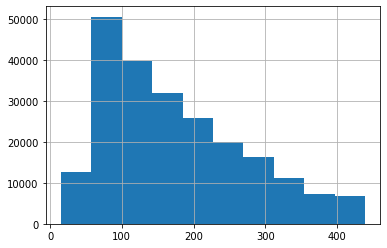

In [5]:
df['metroscubiertos'].hist()

Otra posibilidad al ser valores numéricos es ver su distribución mediante la función describe(). Como parámetro acepta que le pasemos todos los percentiles que queremos ver.

In [6]:
df['metroscubiertos'].describe()

count    222600.000000
mean        174.016774
std          98.152950
min          15.000000
25%          90.000000
50%         153.000000
75%         240.000000
max         439.000000
Name: metroscubiertos, dtype: float64

En pandas es simple filtrar el dataset por el valor del alguna columna. 
Igualar una columna a un valor (df['ciudad']=='Mérida'), nos devuelve una serie de booleanos que sirven para indexar el dataset. También podemos filtrar filas en base a otros criterios, como tirar las que tienen valores "NaN" con la función dropna()

In [8]:
df_merida = df[df['ciudad']=='Mérida'].dropna()

Para ver la relación entre algunas variables puede ser útil realizar un primer gráfico. Pandas tiene sus funciones para graficar basadas en matplotlib. Existen otras librerías como Seaborn que, si bien también está basada sobre matplotlib, da algunas funcionalidades más.

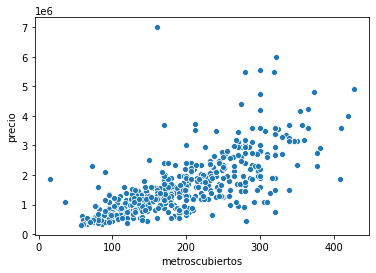

In [9]:
sns.scatterplot(data=df_merida, x='metroscubiertos', y='precio')

En pandas es muy simple agregar una nueva columna con un valor calculado a partir de las otras. Por ejemplo, nuestro inmuebles serán "copados para ejercitar" si tiene gimnasio y pileta.

In [11]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'copado para ejercitar'],
      dtype='object')

Más allá de que podemos segmentar utilizando filtros, a veces queremos realizar una acción para cada una de las segmentaciones posibles. Esto lo podemos lograr con la función groupby() que agrupa los valores y luego no deja aplicar una función sobre el grupo.

In [14]:
df.info()
df.head()
df.describe()
for c in df.columns:
    #print(f"---- {c} ---")
    #print(df[c].value_counts())
    pass


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 24 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

Querétaro                                 12646
Benito Juárez                             11014
Zapopan                                   10360
San Luis Potosí                            7925
Mérida                                     7162
Monterrey                                  6946
Alvaro Obregón                             6633
Cuauhtémoc                                 6614
Naucalpan de Juárez                        6554
Miguel Hidalgo                             5795
Atizapán de Zaragoza                       5783
Tlalpan                                    5721
Huixquilucan                               5718
Coyoacán                                   5293
Puebla                                     4636
Guadalajara                                4006
San Andrés Cholula                         3805
Cancún                                     3779
Cuernavaca                                 3775
Chihuahua                                  3757
Tlalnepantla de Baz                     

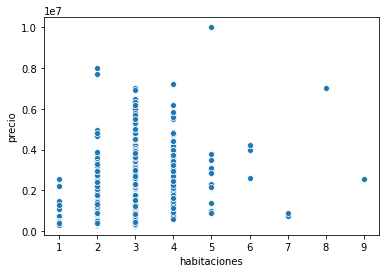

In [40]:
df_ciudad = df[df['ciudad']=='Querétaro'].dropna()
sns.scatterplot(data=df_ciudad, x='habitaciones', y='precio')
df['ciudad'].value_counts()

before 2289 after 2256


,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
3677,196617,milenio iii excelente oportunidad,"excelente casa, zona residencial, 3 recamaras,...",Casa,SENDERO DEL RESPLANDOR #3,Querétaro,Querétaro,5.0,3.0,2.0,...,339193.0,20.597238,-100.346271,2016-03-28 00:00:00,0.0,0.0,0.0,1.0,1.0,1590000.0


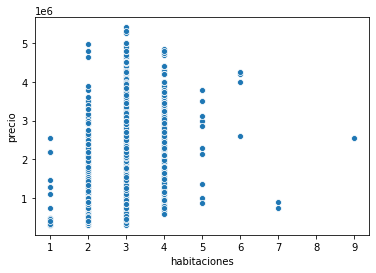

In [41]:
from scipy import stats
df_ciudad_prunned = df_ciudad[(np.abs(stats.zscore(df_ciudad['precio'])) < 3)]
sns.scatterplot(data=df_ciudad_prunned, x='habitaciones', y='precio')
print(f"before {len(df_ciudad.index)} after {len(df_ciudad_prunned.index)}")
df_ciudad.iloc[[27]]
#(np.abs(stats.zscore(df_ciudad['habitaciones'])) < 3)

In [16]:
for c in ['metrostotales','metroscubiertos']:
    pass
print(df['lat'].mean())
print(df['lng'].mean())
print(df['lat'].var())
print(df['lng'].var())
print("Mean --------------------------------------\n",
      df.groupby('tipodepropiedad')['precio'].mean().sort_values())
print("Variance --------------------------------------\n",
      df.groupby('tipodepropiedad')['precio'].var().sort_values())

20.696818141861158
-99.5092209797803
9.846318494416739
94.94831508694203
Mean --------------------------------------
 tipodepropiedad
Garage                           5.000000e+05
Lote                             9.887608e+05
Duplex                           1.271758e+06
Terreno                          1.805202e+06
Local en centro comercial        2.212631e+06
Local Comercial                  2.365064e+06
Casa                             2.398158e+06
Terreno comercial                2.472025e+06
Departamento Compartido          2.560162e+06
Bodega comercial                 2.693758e+06
Apartamento                      2.763769e+06
Villa                            2.767352e+06
Otros                            2.881689e+06
Casa en condominio               2.898927e+06
Hospedaje                        3.000000e+06
Oficina comercial                3.148533e+06
Quinta Vacacional                3.187426e+06
Huerta                           3.543350e+06
Terreno industrial               3.647

In [199]:
df = pd.read_csv('../data/train.csv')

In [206]:
df['copado para ejercitar'] =  df['piscina'] + df['gimnasio'] 
df['posicionamiento'] = df['centroscomercialescercanos'] + df['escuelascercanas'] + df['piscina'] + df['gimnasio'] 
df['espacio libre'] = df['metrostotales'] - df['metroscubiertos'] 

property_value = df.groupby('tipodepropiedad')['precio'].mean().sort_values()
i = len(property_value)
for key in property_value.keys():
    property_value[key] = i
    i-=1
df['valor de tipodepropiedad'] = df['tipodepropiedad'].map(property_value)

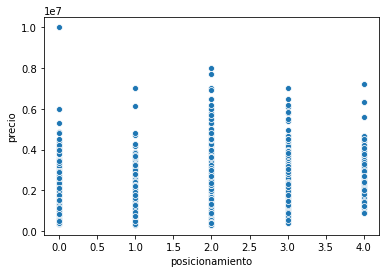

In [201]:
df_prop = df#[(df['tipodepropiedad']=='Casa') ].dropna()
df_prop_ciudad = df_prop[df_prop['ciudad']=='Querétaro'].dropna()
#sns.scatterplot(data=df_prop, x='metroscubiertos', y='precio')
#sns.scatterplot(data=df_prop_ciudad, x='metroscubiertos', y='precio')
sns.scatterplot(data=df_prop_ciudad, x='posicionamiento', y='precio')
#df_prop_ciudad['tipodepropiedad']

In [202]:
rows = []
valid_columns = []
for c in df_prop_ciudad.columns:
    if np.issubdtype(df[c].dtype, np.number):
        valid_columns.append(c)
        variable = c
        #print(f'---------------------------------------------------------------- {variable}')
        values = []
        for c in df_prop_ciudad.columns:
            if np.issubdtype(df[c].dtype, np.number):
                values.append(df_prop_ciudad[c].corr(df[variable]).round(3))
                #print(f"{c} = {df_prop_ciudad[c].corr(df[variable])}")
        rows.append(values)

In [203]:
np.array(valid_columns).reshape(-1,1).shape
#np.array(rows).shape
np.append(np.array(rows), np.array(valid_columns).reshape(-1,1), axis=1).shape

(20, 21)

AxesSubplot(0.125,0.125;0.62x0.755)


,variable,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,...,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,copado para ejercitar,posicionamiento,espacio libre,valor de tipodepropiedad
0,id,1.0,0.026,0.011,0.013,-0.001,0.02,0.018,-0.023,0.013,...,0.002,0.011,0.007,0.011,-0.003,0.011,0.006,0.007,-0.004,0.009
1,antiguedad,0.026,1.0,0.096,-0.238,-0.127,-0.015,0.005,-0.034,-0.024,...,-0.087,-0.149,-0.171,0.007,-0.002,0.001,-0.17,-0.087,0.032,0.075
2,habitaciones,0.011,0.096,1.0,0.197,0.431,0.438,0.33,0.007,-0.016,...,-0.071,0.033,-0.007,0.01,0.008,0.342,-0.039,-0.013,-0.182,0.091
3,garages,0.013,-0.238,0.197,1.0,0.399,0.432,0.453,0.05,-0.01,...,0.048,0.09,0.127,0.074,0.086,0.393,0.118,0.131,0.017,0.026
4,banos,-0.001,-0.127,0.431,0.399,1.0,0.689,0.581,0.075,0.006,...,0.036,0.1,0.123,0.04,0.038,0.642,0.109,0.091,-0.191,0.065
5,metroscubiertos,0.02,-0.015,0.438,0.432,0.689,1.0,0.794,0.052,0.014,...,0.021,0.058,0.055,0.057,0.061,0.855,0.051,0.077,-0.352,0.108
6,metrostotales,0.018,0.005,0.33,0.453,0.581,0.794,1.0,0.053,0.022,...,-0.008,0.01,0.035,0.044,0.034,0.784,0.023,0.045,0.289,0.12
7,idzona,-0.023,-0.034,0.007,0.05,0.075,0.052,0.053,1.0,0.004,...,-0.016,-0.024,-0.028,-0.02,-0.026,0.039,-0.029,-0.035,-0.001,0.032
8,lat,0.013,-0.024,-0.016,-0.01,0.006,0.014,0.022,0.004,1.0,...,0.022,-0.032,-0.034,-0.016,-0.019,0.017,-0.015,-0.023,0.012,0.015
9,lng,-0.009,-0.012,-0.018,-0.02,-0.012,-0.002,0.004,-0.003,0.218,...,-0.012,0.006,0.001,-0.019,-0.013,-0.001,-0.005,-0.017,0.01,-0.037


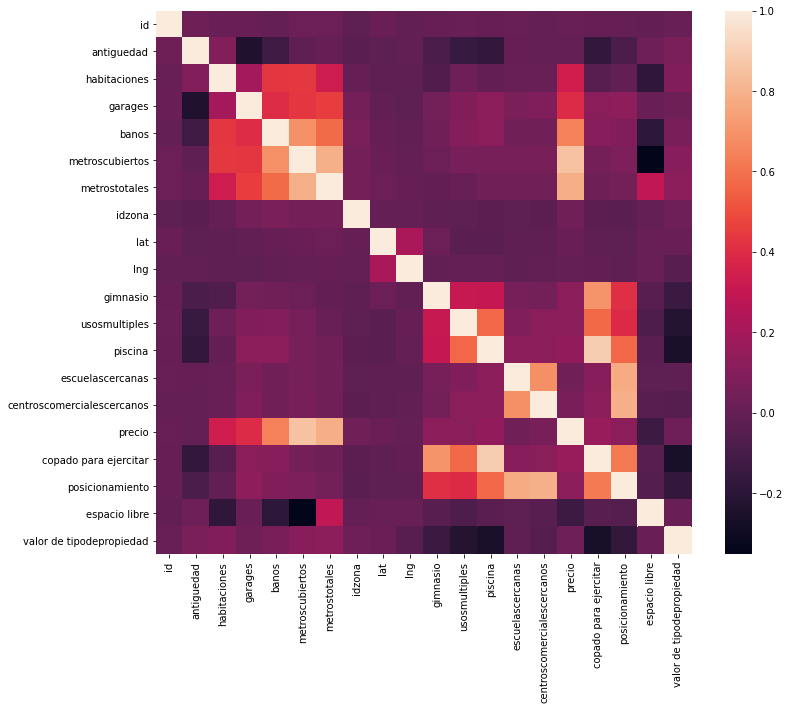

In [207]:
fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches       
corr_df = pd.DataFrame(np.append(np.array(valid_columns).reshape(-1,1), np.array(rows), axis=1),columns=['variable']+valid_columns)
corr_heatmap = sns.heatmap(np.array(rows), xticklabels=valid_columns, yticklabels=valid_columns)
print(corr_heatmap)
corr_df

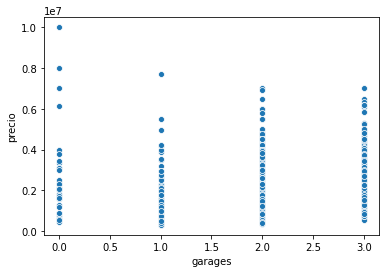

In [143]:
sns.scatterplot(data=df_prop_ciudad, x='garages', y='precio')

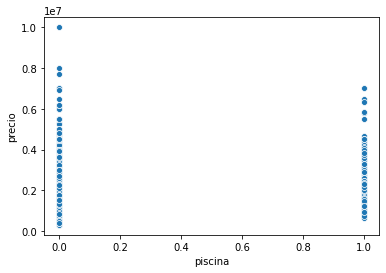

In [144]:
sns.scatterplot(data=df_prop_ciudad, x='piscina', y='precio')

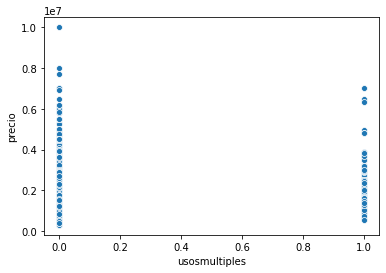

In [145]:
sns.scatterplot(data=df_prop_ciudad, x='usosmultiples', y='precio')

before 152 after 149
before 539 after 530
before 152 after 149
before 539 after 530
before 152 after 149
before 539 after 530
scores: {'r2': 0.5917905344454206, 'rmse': 560284.733326209, 'rmsle': 0.3818763207367802}
[[9863.36258424]]


array([[8226.35680747]])

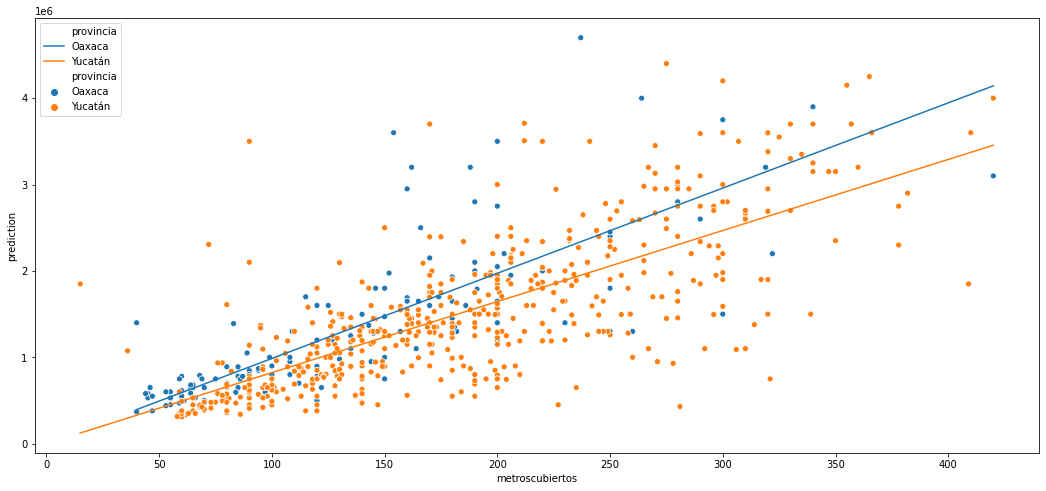

In [42]:
import wrappers

def segment(df):
    df_1 = df[df['provincia']=='Oaxaca'].dropna()
    df_2 = df[df['provincia']=='Yucatán'].dropna()
    
    print(f"before {len(df_1.index)} after {len(df_1[(np.abs(stats.zscore(df_1['precio'])) < 3)].index)}")
    print(f"before {len(df_2.index)} after {len(df_2[(np.abs(stats.zscore(df_2['precio'])) < 3)].index)}")
    
    return [
        df_1[(np.abs(stats.zscore(df_1['precio'])) < 3)],
        df_2[(np.abs(stats.zscore(df_2['precio'])) < 3)],
    ]

clf = wrappers.ProyectionRegression(
    features=['metroscubiertos'],
    explain='precio',
    func_segment = segment,
)


clf.fit(df)
pred = clf.predict(df)

import matplotlib.pyplot as plt
plt.subplots(1, 1, figsize=(18, 8))

sns.scatterplot(data=pred, x='metroscubiertos', y='precio', hue='provincia')
sns.lineplot(data=pred, x='metroscubiertos', y='prediction', hue="provincia")

scores = clf.scores(df, ["r2", "rmse", "rmsle"])
print("scores:", scores)
print(clf._clfs[0].get_x())
clf._clfs[1].get_x()